In [1]:
import pandas as pd

# Read the original dataset for the 2002-2003 season - change with each season's dataset
results = pd.read_csv("Result_Premier_0203.csv", index_col=0)

# Store the original column order
original_columns = results.columns.tolist()

# Reset index to prepare for melt
df_reset = results.reset_index()

# Melt the DataFrame into a long format
melted_df = df_reset.melt(id_vars=df_reset.columns[0], var_name='Away', value_name='Score')

# Rename the first column to 'Home'
melted_df.rename(columns={melted_df.columns[0]: 'Home'}, inplace=True)

# Add season column - Change with each season's dataset
melted_df['Season'] = '2002-2003'

# Pivot the DataFrame
pivot_dfs = melted_df.pivot(index='Home', columns='Away', values='Score')

# Reorder the columns based on the original dataset
pivot_dfs = pivot_dfs[original_columns]

# Display the reordered pivoted DataFrame
print(pivot_dfs.head())


Away              ARS  AST  BIR  BLB  BOL  CHA  CHE  EVE  FUL  LEE  LIV  MCI  \
Home                                                                           
Arsenal           NaN  3~1  2~0  1~2  2~1  2~0  3~2  2~1  2~1  2~3  1~1  2~1   
Aston Villa       1~1  NaN  0~2  3~0  2~0  2~0  2~1  3~2  3~1  0~0  0~1  1~0   
Birmingham City   0~4  3~0  NaN  0~1  3~1  1~1  1~3  1~1  0~0  2~1  2~1  0~2   
Blackburn Rovers  2~0  0~0  1~1  NaN  0~0  1~0  2~3  0~1  2~1  1~0  2~2  1~0   
Bolton Wanderers  2~2  1~0  4~2  1~1  NaN  1~2  1~1  1~2  0~0  0~3  2~3  2~0   

Away              MUN  MID  NEW  SOU  SUN  TOT  WBA  WHU  
Home                                                      
Arsenal           2~2  2~0  1~0  6~1  3~1  3~0  5~2  3~1  
Aston Villa       0~1  3~0  0~1  0~1  1~0  0~1  2~1  4~1  
Birmingham City   0~1  3~0  0~2  3~2  2~0  1~1  1~0  2~2  
Blackburn Rovers  1~0  1~0  5~2  1~0  0~0  1~2  1~1  2~2  
Bolton Wanderers  1~1  2~1  4~3  1~1  1~1  1~0  1~1  1~0  


In [2]:
import pandas as pd
import numpy as np

# Define the function to convert a score to a result
def score_to_result(score):
    if isinstance(score, float) or "~" not in score:  # Diagonal, missing entries, or unexpected format
        return 0
    home, away = score.split("~")
    try:
        home, away = int(home.strip()), int(away.strip())
    except ValueError:  # In case of unexpected characters in the score
        return 0
    if home > away:
        return 1  # win
    elif home == away:
        return 2  # draw
    else:
        return 3  # loss


# Number of teams
N = pivot_dfs.shape[0]

# Initialize the results matrix
R = np.zeros((N, N), dtype=int)

# Populate the results matrix
for i in range(N):
    for j in range(N):
        R[i, j] = score_to_result(pivot_dfs.iloc[i, j])

# The adjacency matrix R now contains the match outcomes for the 2003-2004 season
print(R)


[[0 1 1 3 1 1 1 1 1 3 2 1 2 1 1 1 1 1 1 1]
 [2 0 3 1 1 1 1 1 1 2 3 1 3 1 3 3 1 3 1 1]
 [3 1 0 3 1 2 3 2 2 1 1 3 3 1 3 1 1 2 1 2]
 [1 2 2 0 2 1 3 3 1 1 2 1 1 1 1 1 2 3 2 2]
 [2 1 1 2 0 3 2 3 2 3 3 1 2 1 1 2 2 1 2 1]
 [3 1 3 1 2 0 3 1 3 3 1 2 3 1 3 1 2 3 1 1]
 [2 1 1 3 1 1 0 1 2 1 1 1 2 1 1 2 1 2 1 3]
 [1 1 2 1 2 1 3 0 1 1 3 2 3 1 1 1 1 2 1 2]
 [3 1 3 3 1 1 2 1 0 1 1 3 2 1 1 2 1 1 1 3]
 [3 1 1 3 3 3 1 3 1 0 3 1 1 3 3 2 3 2 2 1]
 [2 2 2 2 1 1 1 2 1 1 0 3 3 2 2 1 2 1 1 1]
 [3 1 1 2 1 3 3 1 1 1 3 0 1 2 1 3 1 3 3 3]
 [1 2 1 1 3 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1]
 [3 3 1 1 1 2 2 2 2 2 1 1 1 0 1 2 1 1 1 2]
 [2 2 1 1 1 1 1 1 1 3 1 1 3 1 0 1 1 1 1 1]
 [1 2 1 2 2 2 2 1 1 1 3 1 3 2 2 0 1 1 1 2]
 [3 1 3 2 3 3 3 3 3 3 1 3 2 3 3 3 0 1 3 3]
 [2 1 1 3 1 2 2 1 2 1 3 3 3 3 3 1 1 0 1 1]
 [3 2 2 3 2 3 3 3 1 3 3 3 3 1 2 1 2 3 0 3]
 [2 2 3 1 2 3 1 3 2 3 3 2 2 1 2 3 1 1 3 0]]


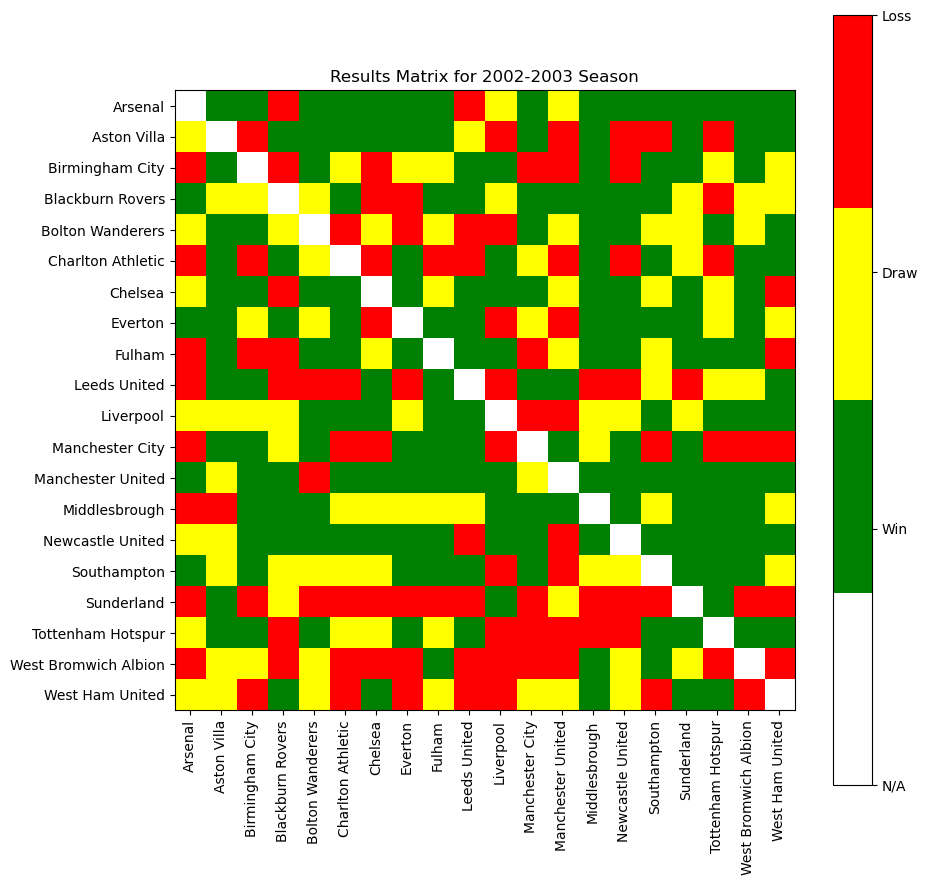

In [3]:
import matplotlib.pyplot as plt


# Create a colormap based on the results matrix
cmap = plt.cm.colors.ListedColormap(['white', 'green', 'yellow', 'red'])

# Plot the matrix using the colormap
plt.figure(figsize=(10, 10))
plt.imshow(R, cmap=cmap, vmin=0, vmax=3)  # vmin and vmax set to match our encoding
plt.title("Results Matrix for 2002-2003 Season") #change with each season
cbar = plt.colorbar(ticks=[0, 1, 2, 3])
cbar.set_ticklabels(['N/A', 'Win', 'Draw', 'Loss'])
plt.xticks(ticks=np.arange(N), labels=pivot_dfs.index, rotation=90)
plt.yticks(ticks=np.arange(N), labels=pivot_dfs.index)
plt.grid(False)
plt.show()


In [4]:
# Redefine the compute_log_likelihood function

def compute_log_likelihood_SBM(R, z, p):
    
    N = R.shape[0]
    log_likelihood = 0
    for i in range(N):
        for j in range(N):
            if R[i, j] > 0:  # Only consider valid entries (win, draw, loss)
                log_likelihood += np.log(p[z[i], z[j], R[i, j] - 1])
    return log_likelihood

# Initialize necessary parameters
K = 3  # Number of blocks
N = R.shape[0]  # Number of teams
z = np.random.randint(0, K, N)
p = np.ones((K, K, 3)) / 3  # Uniform probabilities for win, draw, loss

# Compute the log likelihood for our initialized values
compute_log_likelihood_SBM(R, z, p)


-417.4726696938809

C:\Users\arunr\AppData\Local\Temp\ipykernel_328\642232349.py:11: RuntimeWarning: invalid value encountered in divide
  p_new = counts / counts.sum(axis=-1, keepdims=True)


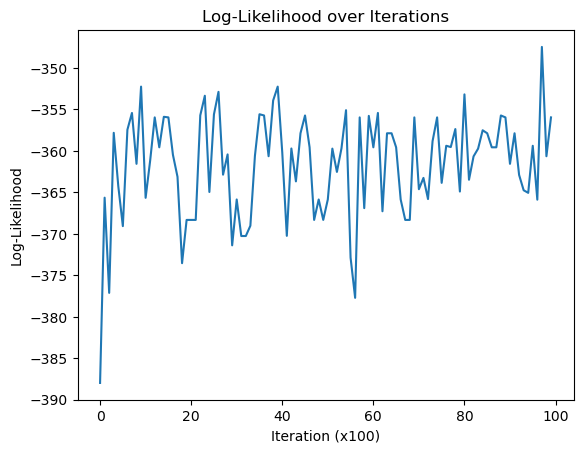

In [5]:
import numpy as np

# Define a function to update block interaction probabilities based on current block assignments and observed data
def update_probabilities(R, z, K):
    counts = np.zeros((K, K, 3))
    N = R.shape[0]
    for i in range(N):
        for j in range(N):
            if i != j:
                counts[z[i], z[j], R[i, j] - 1] += 1
    p_new = counts / counts.sum(axis=-1, keepdims=True)
    return np.nan_to_num(p_new, nan=1.0 / 3)


def gibbs_sampling(R, z_initial, p_initial, K, num_iterations, burn_in=100, thinning=10):
    N = R.shape[0]
    z_samples = []
    p_samples = []
    log_likelihoods = []
    z_current = z_initial.copy()
    p_current = p_initial.copy()

    epsilon = 1e-10

    for it in range(num_iterations):
        for i in range(N):
            p_zi = np.zeros(K)
            for k in range(K):
                log_p_zi_k = epsilon
                for j in range(N):
                    if i != j:
                        log_p_zi_k += np.log(p_current[k, z_current[j], R[i, j] - 1] + epsilon)
                p_zi[k] = np.exp(log_p_zi_k)
            
            if np.sum(p_zi) == 0:
                print("Warning: p_zi sum is zero. Debug required.")
                p_zi += epsilon

            p_zi /= np.sum(p_zi)
            z_current[i] = np.random.choice(K, p=p_zi)
        
        p_current = update_probabilities(R, z_current, K)

        if it % 100 == 0:
            log_likelihood = compute_log_likelihood_SBM(R, z_current, p_current)
            log_likelihoods.append(log_likelihood)

        if it >= burn_in and (it - burn_in) % thinning == 0:
            z_samples.append(z_current.copy())
            p_samples.append(p_current.copy())

    return z_samples, p_samples, log_likelihoods

# Assuming R is your results matrix and you want to initialize with 4 blocks
K = 3
N = R.shape[0]  # Assuming R is already defined
np.random.seed(42)

z_initial = np.random.randint(0, K, N)
p_initial = np.ones((K, K, 3)) / 3  # Initial uniform probabilities

# Number of Gibbs sampling iterations
num_iterations = 10000
burn_in = 1000  # Burn-in period
thinning = 10  # Thinning interval

z_samples, p_samples, log_likelihoods = gibbs_sampling(R, z_initial, p_initial, K, num_iterations, burn_in, thinning)

# Plotting the log-likelihoods
plt.plot(log_likelihoods)
plt.xlabel('Iteration (x100)')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood over Iterations')
plt.show()

# Return the last sample for block assignments and interaction probabilities
z_last_sample = z_samples[-1]
p_last_sample = p_samples[-1]


In [6]:
def estimate_p(R, z_samples, K):
    """
    Estimate the block interaction probabilities p based on Gibbs samples of z.
    """
    # Initialize counts for the block interactions
    counts = np.zeros((K, K, 3))

    # Go through each sample of z and count the block interactions
    for z in z_samples:
        for i in range(N):
            for j in range(N):
                if i != j:  # Ignore diagonal
                    counts[z[i], z[j], R[i, j] - 1] += 1

    # Convert counts to probabilities
    p_estimate = counts / counts.sum(axis=2, keepdims=True)
    
    return p_estimate

# Estimate block interaction probabilities p
p_estimate = estimate_p(R, z_samples, K)
p_estimate


array([[[0.47116142, 0.26899606, 0.25984252],
        [0.43025893, 0.21577255, 0.35396852],
        [0.46697208, 0.22484987, 0.30817805]],

       [[0.57068878, 0.1842613 , 0.24504992],
        [0.48202651, 0.28037321, 0.23760028],
        [0.53491015, 0.19181892, 0.27327094]],

       [[0.52593945, 0.20584412, 0.26821643],
        [0.49200132, 0.22453129, 0.28346739],
        [0.47976212, 0.27080555, 0.24943233]]])

In [7]:
from itertools import permutations
from scipy.spatial import distance

def label_switching_correction(z_samples, K):
    """
    Correct for label switching in the Gibbs samples of z.
    """
    corrected_samples = [z_samples[0]]  # First sample remains unchanged
    
    for z_current, z_next in zip(z_samples[:-1], z_samples[1:]):
        best_permutation = None
        best_distance = float('inf')
        
        # Check all possible permutations of labels
        for perm in permutations(range(K)):
            z_permuted = np.array([perm[z] for z in z_next])
            dist = distance.hamming(z_current, z_permuted)
            
            if dist < best_distance:
                best_distance = dist
                best_permutation = z_permuted
        
        corrected_samples.append(best_permutation)
    
    return corrected_samples

# Apply label switching correction
z_corrected_samples = label_switching_correction(z_samples, K)
z_corrected_samples[-1]  # Return the last corrected sample


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1])

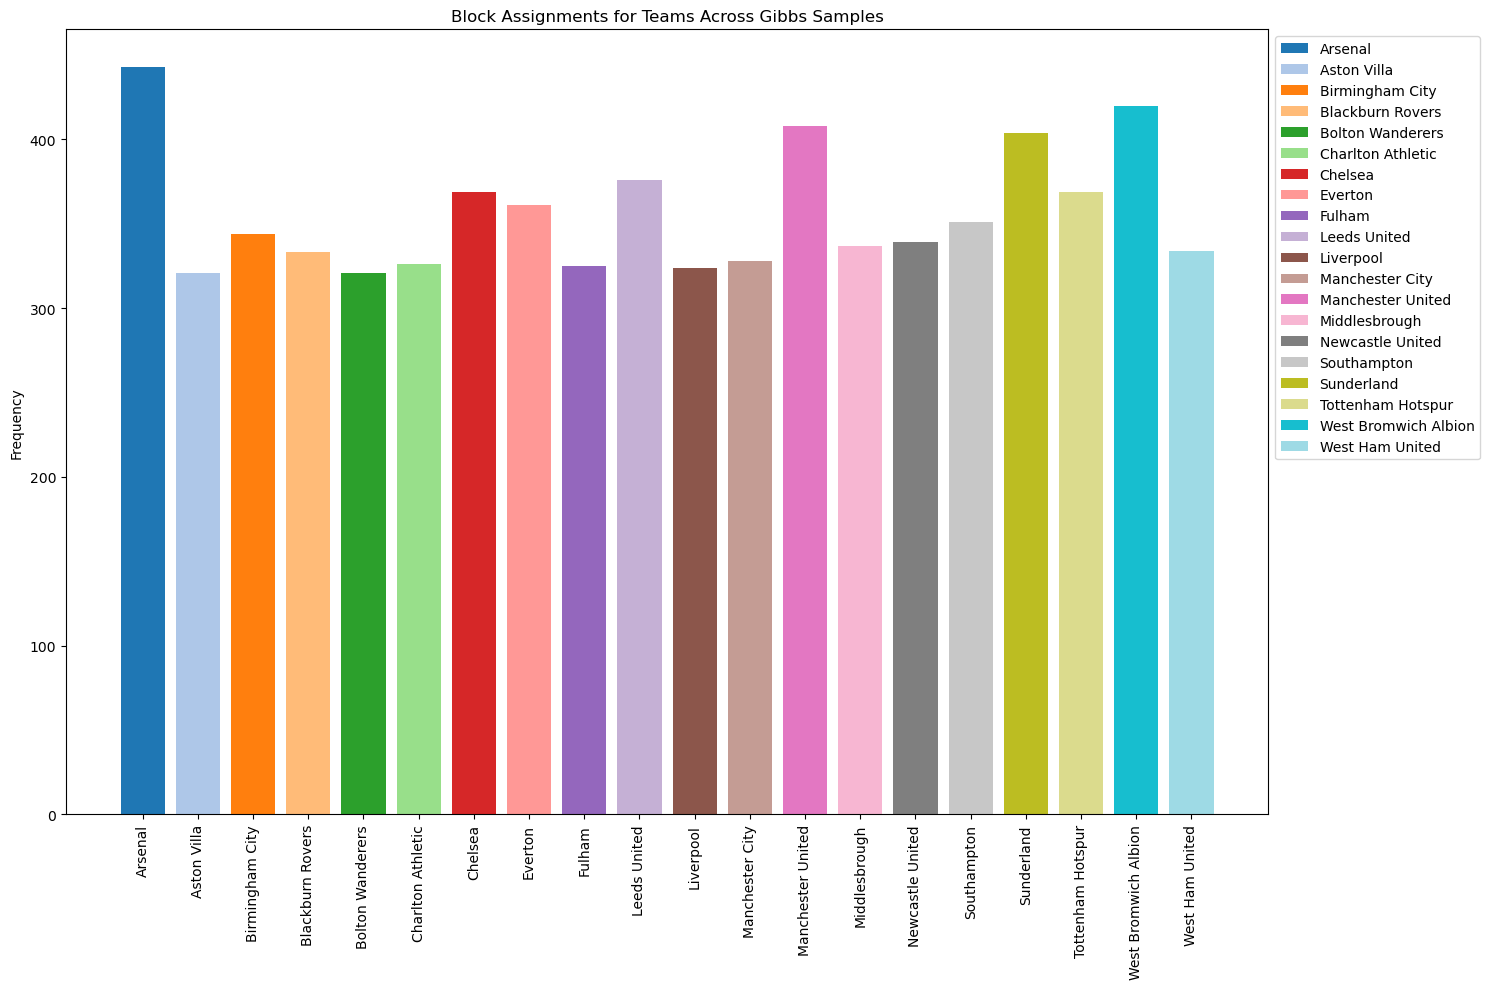

In [8]:
import matplotlib.pyplot as plt

def plot_block_assignments(z_corrected_samples, team_names):
    """
    Plot the frequency of each team's assignment to the different blocks across all Gibbs samples.
    """
    # Count the block assignments for each team
    block_counts = np.zeros((len(team_names), K))
    for z in z_corrected_samples:
        for i, block in enumerate(z):
            block_counts[i, block] += 1

    # Plot the block assignments
    plt.figure(figsize=(15, 10))
    for i, team in enumerate(team_names):
        plt.bar(i, block_counts[i].max(), label=team, tick_label=team, color=plt.cm.tab20(i / len(team_names)))

    plt.xticks(np.arange(len(team_names)), team_names, rotation=90)
    plt.ylabel("Frequency")
    plt.title("Block Assignments for Teams Across Gibbs Samples")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Plot block assignments for teams
plot_block_assignments(z_corrected_samples, pivot_dfs.index)


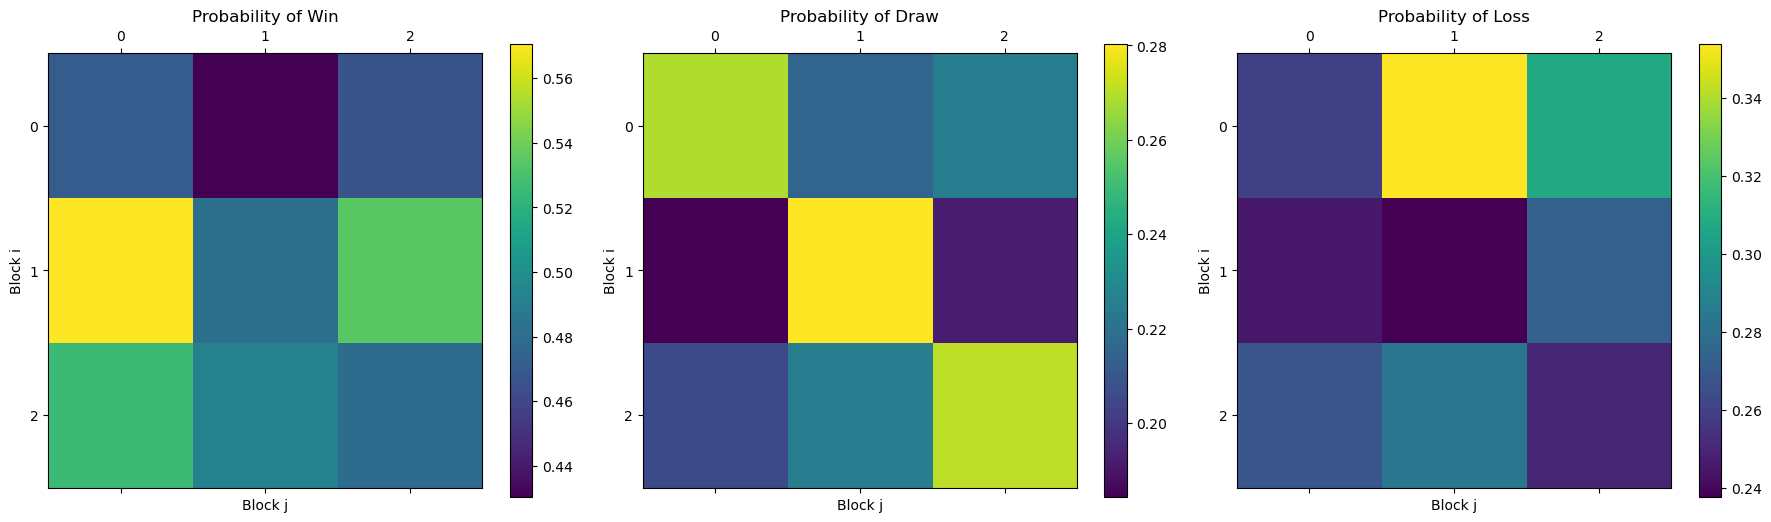

In [9]:
def plot_heatmaps(p_estimate, outcome_labels):
    """
    Plot heatmaps for the block interaction probabilities.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for i, label in enumerate(outcome_labels):
        ax = axes[i]
        cax = ax.matshow(p_estimate[:, :, i], cmap="viridis")
        ax.set_title(f"Probability of {label}")
        ax.set_xlabel("Block j")
        ax.set_ylabel("Block i")
        fig.colorbar(cax, ax=ax)

    plt.tight_layout()
    plt.show()

# Outcome labels
outcome_labels = ["Win", "Draw", "Loss"]

# Plot the heatmaps
plot_heatmaps(p_estimate, outcome_labels)


In [10]:
def list_teams_by_block(z_corrected_samples, team_names):
    """
    Identify which teams are most frequently assigned to each block.
    """
    # Count the block assignments for each team
    block_counts = np.zeros((len(team_names), K))
    for z in z_corrected_samples:
        for i, block in enumerate(z):
            block_counts[i, block] += 1

    # Identify the most frequent block for each team
    most_frequent_blocks = block_counts.argmax(axis=1)
    
    # List teams by block
    teams_by_block = {k: [] for k in range(K)}
    for i, block in enumerate(most_frequent_blocks):
        teams_by_block[block].append(team_names[i])
    
    return teams_by_block

# List the teams most frequently assigned to each block
teams_by_block = list_teams_by_block(z_corrected_samples, pivot_dfs.index)
teams_by_block


{0: ['Bolton Wanderers', 'Leeds United', 'Sunderland', 'West Bromwich Albion'],
 1: ['Arsenal', 'Chelsea', 'Manchester United', 'Newcastle United'],
 2: ['Aston Villa',
  'Birmingham City',
  'Blackburn Rovers',
  'Charlton Athletic',
  'Everton',
  'Fulham',
  'Liverpool',
  'Manchester City',
  'Middlesbrough',
  'Southampton',
  'Tottenham Hotspur',
  'West Ham United']}

<Figure size 1500x1000 with 0 Axes>

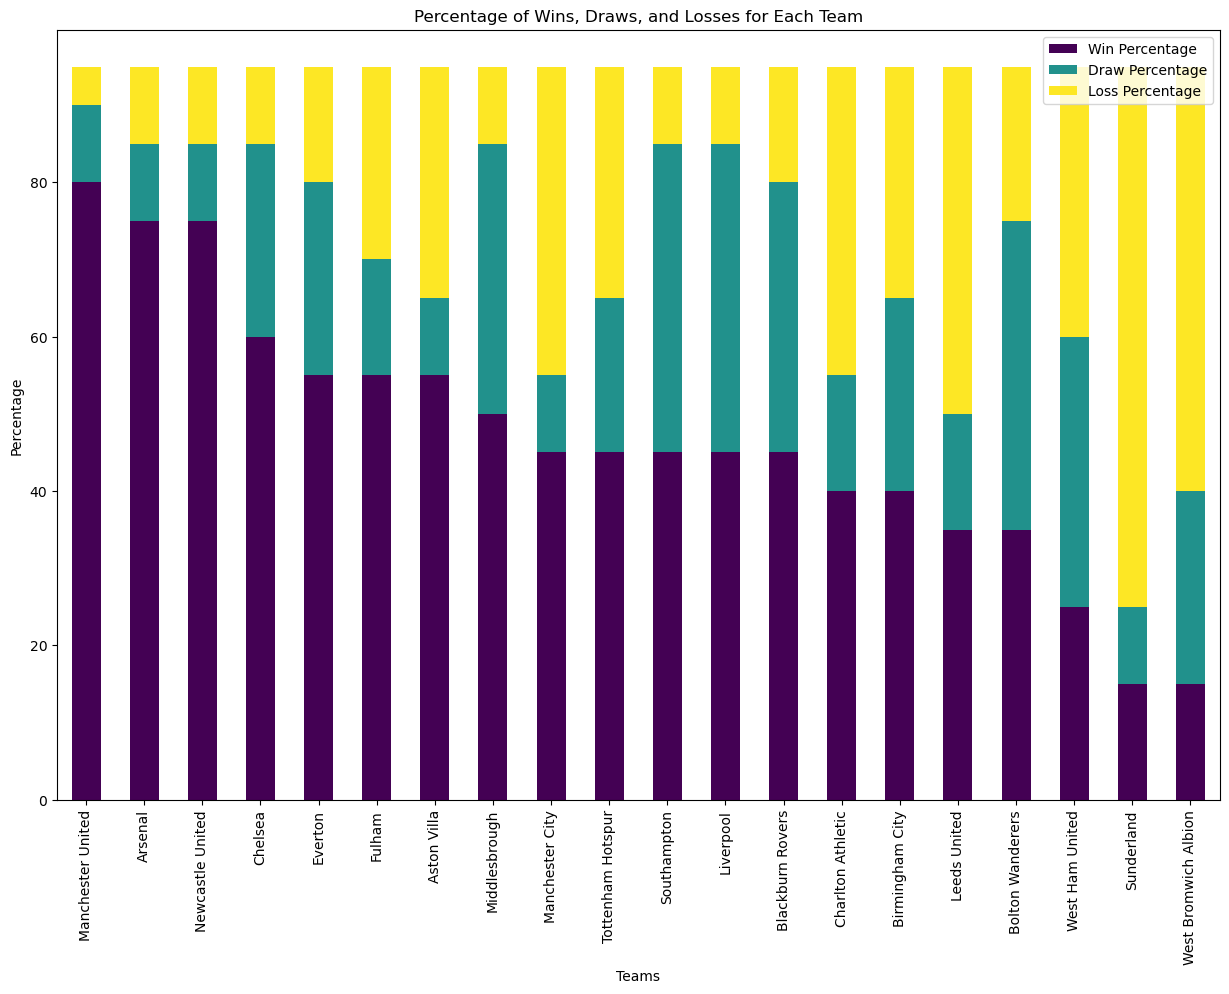

In [11]:
# 1. Calculate the percentage of wins, draws, and losses for each team

# Convert the results matrix R back to win, draw, loss format
results_df = pd.DataFrame(R, index=pivot_dfs.index, columns=pivot_dfs.columns)

# Calculate win, draw, and loss percentages
win_percentage = (results_df == 1).sum(axis=1) / N * 100
draw_percentage = (results_df == 2).sum(axis=1) / N * 100
loss_percentage = (results_df == 3).sum(axis=1) / N * 100

# Combine the percentages into a DataFrame
percentage_df = pd.DataFrame({
    'Win Percentage': win_percentage,
    'Draw Percentage': draw_percentage,
    'Loss Percentage': loss_percentage
})

# Order by position in the final league table (assuming higher win percentage indicates higher position)
percentage_df = percentage_df.sort_values(by='Win Percentage', ascending=False)

# Plot
plt.figure(figsize=(15, 10))
percentage_df.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title("Percentage of Wins, Draws, and Losses for Each Team")
plt.ylabel("Percentage")
plt.xlabel("Teams")
plt.show()


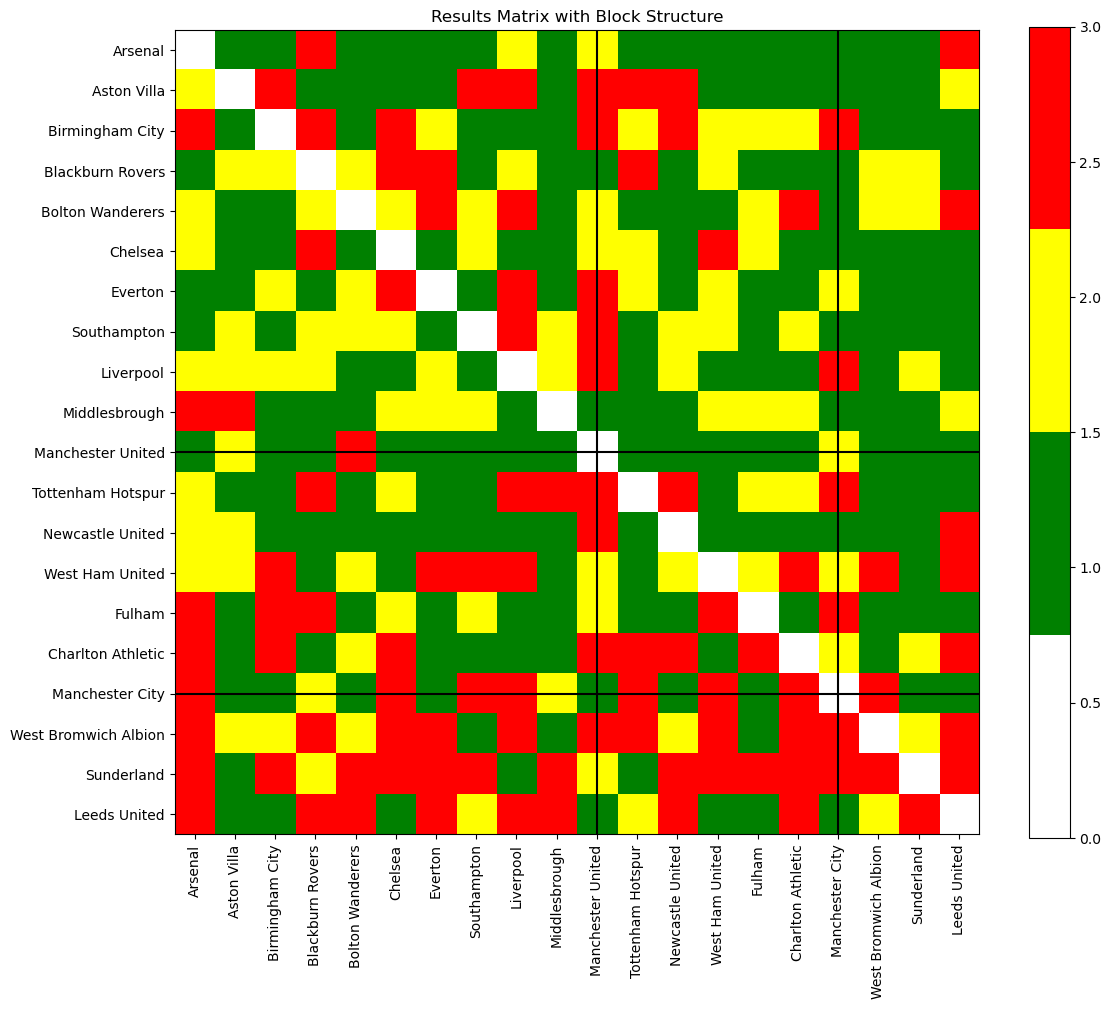

In [12]:
# Re-defining the function to plot results matrix with blocks, as it wasn't executed earlier due to the error
def plot_results_matrix_with_blocks(R, z_corrected_samples, team_names):
    block_order = np.argsort(z_corrected_samples[-1])
    ordered_R = R[block_order, :][:, block_order]
    colors = {0: 'white', 1: 'green', 2: 'yellow', 3: 'red'}
    cmap = [colors[val] for val in range(4)]
    plt.figure(figsize=(12, 10))
    plt.imshow(ordered_R, cmap=plt.matplotlib.colors.ListedColormap(cmap))
    boundaries = np.where(np.diff(z_corrected_samples[-1][block_order]))[0]
    for boundary in boundaries:
        plt.axhline(y=boundary, color='black', linewidth=1.5)
        plt.axvline(x=boundary, color='black', linewidth=1.5)
    plt.xticks(np.arange(len(team_names)), [team_names[i] for i in block_order], rotation=90)
    plt.yticks(np.arange(len(team_names)), [team_names[i] for i in block_order])
    plt.title("Results Matrix with Block Structure")
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# Plot the results matrix with blocks
plot_results_matrix_with_blocks(R, z_corrected_samples, pivot_dfs.index)

In [13]:
# Identify the dominant block based on the win percentage
dominant_block = percentage_df.groupby(z_corrected_samples[-1])['Win Percentage'].mean().idxmax()

# Calculate the posterior probability of each team belonging to the dominant block
posterior_prob_dominant_block = np.mean(np.array(z_corrected_samples) == dominant_block, axis=0)

# Combine team names with their posterior probabilities
dominant_block_probabilities = pd.Series(posterior_prob_dominant_block, index=pivot_dfs.index).sort_values(ascending=False)

dominant_block_probabilities


Home
West Bromwich Albion    0.466667
Sunderland              0.448889
Leeds United            0.417778
Bolton Wanderers        0.356667
Birmingham City         0.354444
Blackburn Rovers        0.345556
Middlesbrough           0.342222
Everton                 0.340000
Liverpool               0.337778
Charlton Athletic       0.334444
West Ham United         0.332222
Southampton             0.330000
Manchester City         0.324444
Aston Villa             0.314444
Fulham                  0.308889
Tottenham Hotspur       0.305556
Newcastle United        0.293333
Chelsea                 0.241111
Manchester United       0.204444
Arsenal                 0.194444
dtype: float64

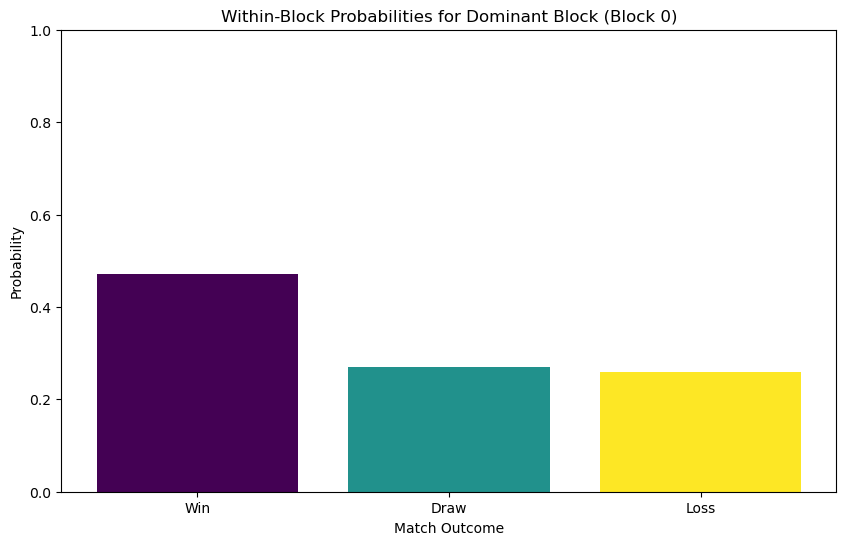

In [14]:
# Extract within-block probabilities for dominant block
within_block_probabilities = p_estimate[dominant_block, dominant_block]

# Convert to DataFrame for better visualization
within_block_prob_df = pd.DataFrame({
    'Outcome': ['Win', 'Draw', 'Loss'],
    'Probability': within_block_probabilities
})

# Recreate the bar plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(within_block_prob_df['Outcome'], within_block_prob_df['Probability'], color=plt.cm.viridis(np.linspace(0, 1, 3)))
plt.title(f"Within-Block Probabilities for Dominant Block (Block {dominant_block})")
plt.ylabel("Probability")
plt.xlabel("Match Outcome")
plt.ylim(0, 1)
plt.show()



In [15]:
# Calculate observed frequencies of match outcomes between blocks
observed_frequencies = np.zeros((K, K, 3))

for i in range(K):
    for j in range(K):
        mask_i = z_corrected_samples[-1] == i
        mask_j = z_corrected_samples[-1] == j
        submatrix = R[mask_i, :][:, mask_j]
        
        observed_frequencies[i, j, 0] = np.mean(submatrix == 1)  # Win
        observed_frequencies[i, j, 1] = np.mean(submatrix == 2)  # Draw
        observed_frequencies[i, j, 2] = np.mean(submatrix == 3)  # Loss

# Calculate the difference between observed frequencies and estimated probabilities
difference = observed_frequencies - p_estimate

# Summarize the average absolute difference for each outcome
avg_difference = np.abs(difference).mean(axis=(0, 1))
avg_difference


array([0.19576048, 0.0613806 , 0.16785864])

In [16]:
# Initialize an empty dictionary for the mapping
team_name_mapping = {}

# Loop through the full team names and abbreviations to fill the mapping
for full_name, abbr in zip(pivot_dfs.index, pivot_dfs.columns):
    team_name_mapping[full_name] = abbr

# Initialize a DataFrame to store the points for each team
team_points_df = pd.DataFrame(index=pivot_dfs.index, columns=['Points'])
team_points_df['Points'] = 0  # Initialize all points to 0

# Calculate the points for each team
for home_team in pivot_dfs.index:
    for away_team_abbr in pivot_dfs.columns:
        score = pivot_dfs.loc[home_team, away_team_abbr]
        if pd.isna(score) or "~" not in score:  # Skip missing or invalid entries
            continue
        try:
            home_goals, away_goals = map(int, score.split("~"))
        except ValueError:  # Skip if goals are not integers (malformed entries)
            continue

        # Assign points based on match outcome
        if home_goals > away_goals:  # Home win
            team_points_df.loc[home_team, 'Points'] += 3
        elif home_goals == away_goals:  # Draw
            team_points_df.loc[home_team, 'Points'] += 1
            away_team = [key for key, value in team_name_mapping.items() if value == away_team_abbr][0]
            team_points_df.loc[away_team, 'Points'] += 1
        else:  # Away win
            away_team = [key for key, value in team_name_mapping.items() if value == away_team_abbr][0]
            team_points_df.loc[away_team, 'Points'] += 3

# Sort by points to verify
team_points_df = team_points_df.sort_values(by='Points', ascending=False)

team_points_df


,Points
Home,
Manchester United,83
Arsenal,78
Newcastle United,69
Chelsea,67
Liverpool,64
Blackburn Rovers,60
Everton,59
Southampton,52
Manchester City,51


In [17]:
# Map the team names to their corresponding clusters (blocks)
team_to_block = {}
for block, teams in teams_by_block.items():
    for team in teams:
        team_to_block[team] = block

# Add the cluster assignments to the team_points_df
team_points_df['Cluster'] = team_points_df.index.map(team_to_block)

# Calculate the average points for each cluster
cluster_average_points = team_points_df.groupby('Cluster')['Points'].mean().sort_values(ascending=False)
cluster_ranking = cluster_average_points.index.tolist()

cluster_average_points, cluster_ranking

(Cluster
 1    74.250000
 2    51.416667
 0    34.000000
 Name: Points, dtype: float64,
 [1, 2, 0])

In [18]:
# Initialize counters for total inter-cluster matches and upsets
total_inter_cluster_matches = 0
total_upsets = 0

# Loop through each match to identify inter-cluster matches and upsets
for home_team in pivot_dfs.index:
    home_team_cluster = team_to_block[home_team]
    for away_team_abbr in pivot_dfs.columns:
        away_team = [key for key, value in team_name_mapping.items() if value == away_team_abbr][0]
        away_team_cluster = team_to_block[away_team]
        
        # Skip if it's not an inter-cluster match
        if home_team_cluster == away_team_cluster:
            continue
        
        total_inter_cluster_matches += 1
        
        score = pivot_dfs.loc[home_team, away_team_abbr]
        if pd.isna(score) or "~" not in score:  # Skip missing or invalid entries
            continue
        
        try:
            home_goals, away_goals = map(int, score.split("~"))
        except ValueError:  # Skip if goals are not integers (malformed entries)
            continue
        
        # Check if it's an upset (lower-ranked cluster's team wins)
        if home_goals > away_goals and cluster_ranking.index(home_team_cluster) > cluster_ranking.index(away_team_cluster):
            total_upsets += 1
        elif away_goals > home_goals and cluster_ranking.index(away_team_cluster) > cluster_ranking.index(home_team_cluster):
            total_upsets += 1

# Calculate the Inter-Cluster Upset Rate
if total_inter_cluster_matches > 0:
    inter_cluster_upset_rate = total_upsets / total_inter_cluster_matches
else:
    inter_cluster_upset_rate = "N/A (No inter-cluster matches found)"

total_inter_cluster_matches, total_upsets, inter_cluster_upset_rate

(224, 44, 0.19642857142857142)